In [45]:
import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from Energy_Levels import MoleculeLevels
np.set_printoptions(precision=5, suppress=True)
import time
from matplotlib.colors import TwoSlopeNorm

In [46]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [47]:
# Bstep = 0.2
# Bz = np.arange(0,5+Bstep,Bstep)
Bz = np.linspace(1e-3,70,2001)
Ez = np.linspace(0,250,1001)
# Estep = 0.01
# Ez = np.arange(0,80+Estep,Estep)
print(len(Ez),len(Bz))
print(len(Ez)*len(Bz))

1001 2001
2003001


In [61]:
state_dict = {}
eval_dict = {}
evec_dict = {}
PTV_dict = {}
N=1

M_range = range(-(N+1),N+2,1)
# M_range=[-1,1]
for M in M_range:
    M_state = MoleculeLevels.initialize_state('YbOH','174','X010',[N],M_values = 'custom',I=[0,1/2],S=1/2,round=10,M_range=[M],P_values=[1/2,3/2],trap=False)
    state_dict[M] = M_state
    print(M)
    t0 = time.perf_counter()
    Bslices = M_state.EB_grid(Ez,Bz,PTV=False,reverse=True,E_or_B_first='B',trap_shifts=False,output=True,evecs=False,EDM_or_MQM='EDM')
    t1 = time.perf_counter()
    elapsed = t1 - t0
    print(elapsed, 'sec\n')
    eval_dict[M] = Bslices[0]
#     PTV_dict[M] = Bslices[1]
#     evec_dict[M] = Bslices[2]
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

-2
[0 1]
40.70843319990672 sec

-1
[0 1 2 3 4 5]
60.40575190004893 sec

0
[0 1 3 2 5 4 6 7]
69.32048830017447 sec

1
[0 1 2 3 4 5]
58.65459889988415 sec

2
[0 1]
40.436323900008574 sec



In [ ]:
read = False
date = '20220503'
folder = r'JSON_data/'
N=1

if read:
    state_dict = {}
    eval_dict = {}
    evec_dict = {}
    PTV_dict = {}
#     for M in range(-(N+1),N+2,1):
    for M in [-1,1]:
        M_state = MoleculeLevels.initialize_state('CaOH','40','X010',[N],M_values = 'custom',I=[0,1/2],S=1/2,round=10,M_range=[M],P_values=[1/2,3/2])
        state_dict[M] = M_state
        print(M)
        eval_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_evals_{}'.format(N,M,date),numpy=True)
        PTV_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_PTV_{}'.format(N,M,date),numpy=True)
        evec_dict[M] = get_json_data(folder+'X010_CaOH_N{}_M{}_EB_grid_evecs_{}'.format(N,M,date),numpy=True)
    mesh = get_json_data(folder+'X010_CaOH_N{}_EzBz_grid_{}'.format(N,date),numpy=True)

In [29]:
save=False
date = '20220503'
folder = r'JSON_data/'
N=N
if save:
    for M in eval_dict.keys():
            save_json_data(eval_dict[M].tolist(),folder+'X010_CaOH_N{}_M{}_EB_grid_evals_{}'.format(N,M,date))
            save_json_data(PTV_dict[M].tolist(),folder+'X010_CaOH_N{}_M{}_EB_grid_PTV_{}'.format(N,M,date))
            save_json_data(evec_dict[M].tolist(),folder+'X010_CaOH_N{}_M{}_EB_grid_evecs_{}'.format(N,M,date))
    mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
    save_json_data(mesh.tolist(),folder+'X010_CaOH_N{}_EzBz_grid_{}'.format(N,date))
Ez = mesh[0,:,0]
Bz = mesh[1,0,:]

Data saved to JSON_data/X010_CaOH_N2_M-3_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-3_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-3_EB_grid_evecs_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-2_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-2_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-2_EB_grid_evecs_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-1_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-1_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M-1_EB_grid_evecs_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M0_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M0_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M0_EB_grid_evecs_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M1_EB_grid_evals_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M1_EB_grid_PTV_20220503.json
Data saved to JSON_data/X010_CaOH_N2_M1_EB_grid_e

In [77]:
mesh = get_json_data(folder+'X010_CaOH_N{}_EzBz_grid_{}'.format(N,date),numpy=True)
Ez = mesh[0,:,0]
Bz = mesh[1,0,:]

NameError: name 'get_json_data' is not defined

-2


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_16268/2820434963.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


-1
0
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_16268/2820434963.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


2


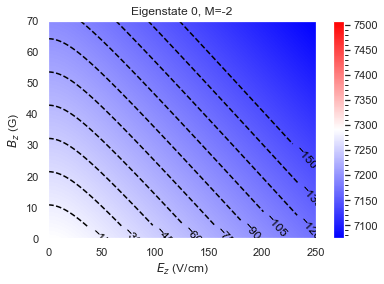

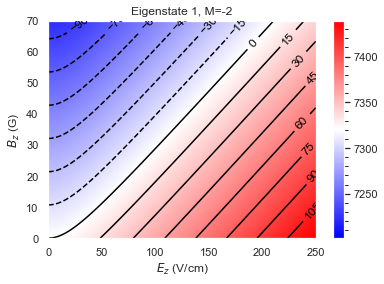

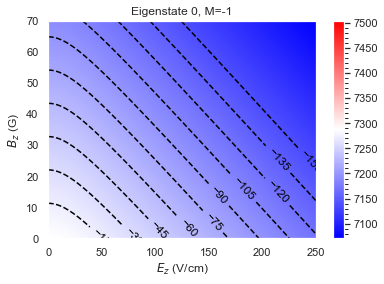

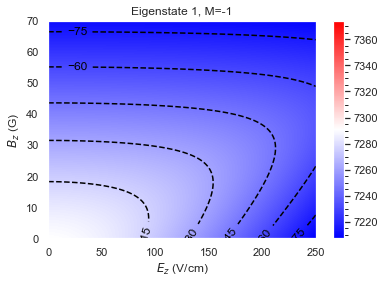

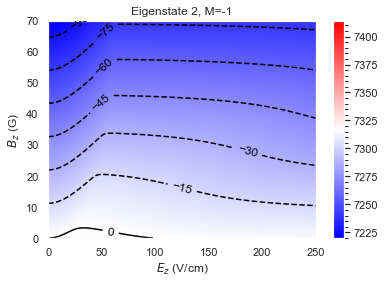

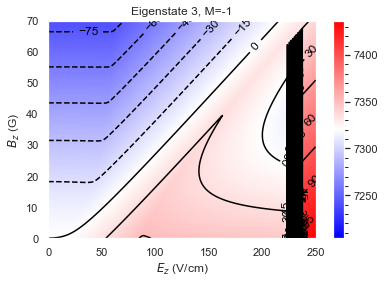

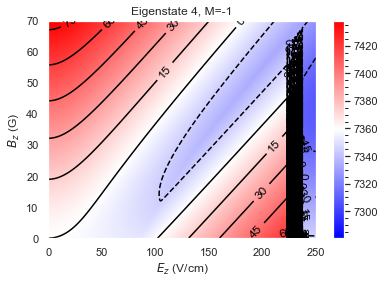

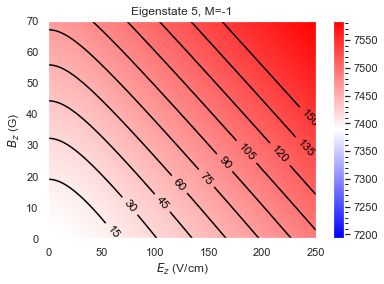

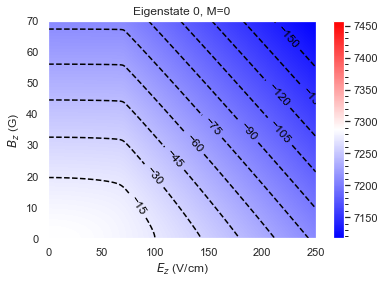

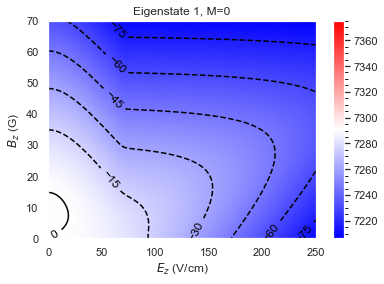

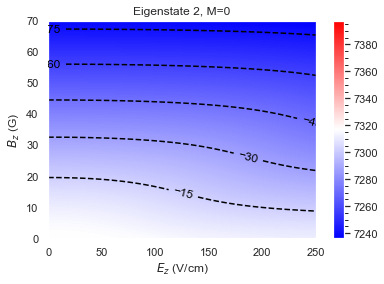

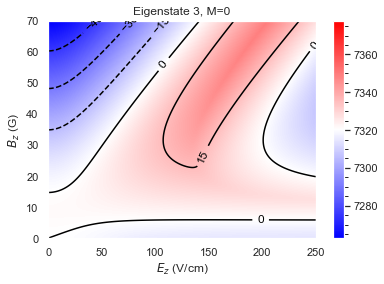

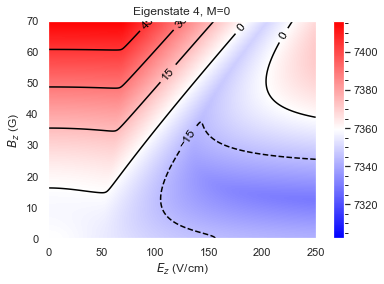

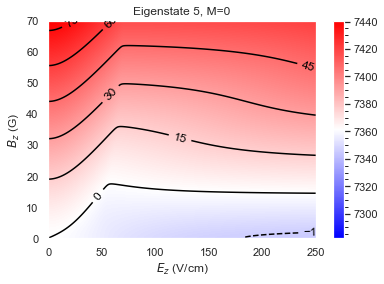

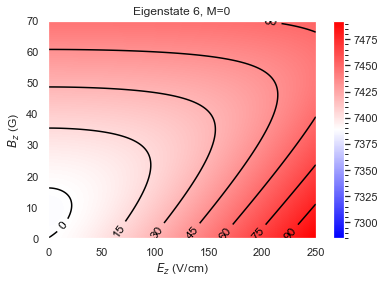

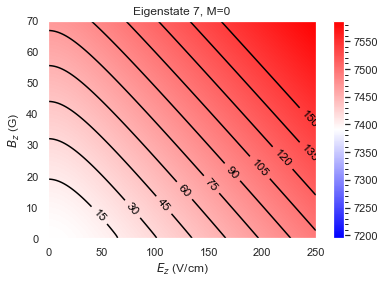

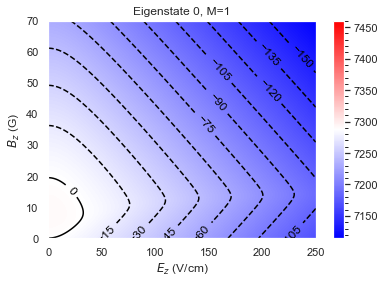

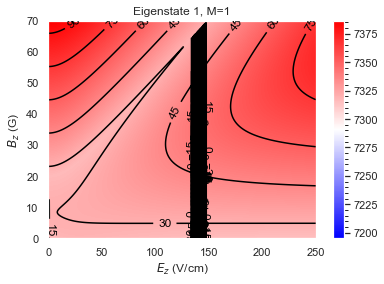

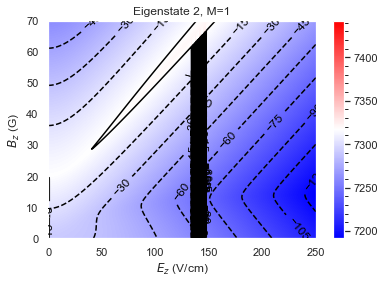

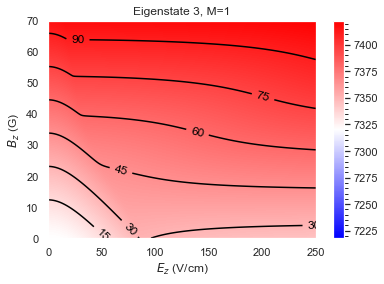

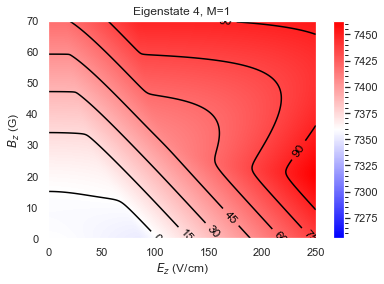

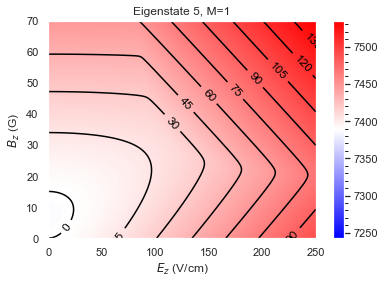

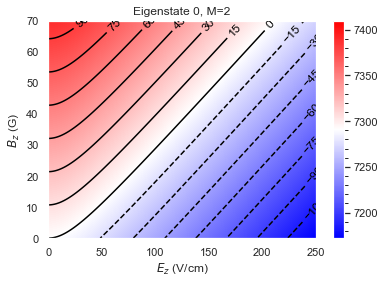

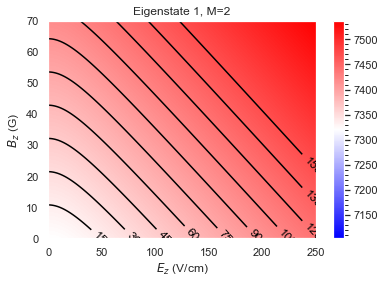

In [60]:
with_contour=True
for M in eval_dict.keys():
    print(M)
    evals_EB = eval_dict[M]
    for i in range(len(evals_EB)):
        plt.figure()
        E0 = evals_EB[i][0,0]
        max_delta = max(abs(evals_EB[i].max()-E0),abs(evals_EB[i].min()-E0))
        plt.grid(False)
        plt.pcolormesh(*mesh,evals_EB[i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=E0,vmin=E0-max_delta,vmax=E0+max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')
        if with_contour:
            try:
                conmap = plt.contour(*mesh,evals_EB[i]-E0,colors='black',levels=np.linspace(-150,150,21))#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")

-2


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_16268/2820434963.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


-1
0
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_16268/2820434963.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


2


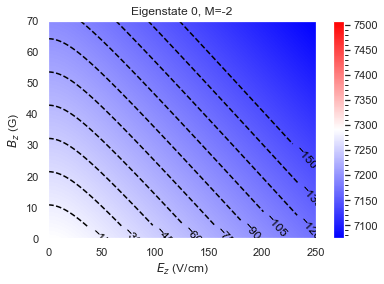

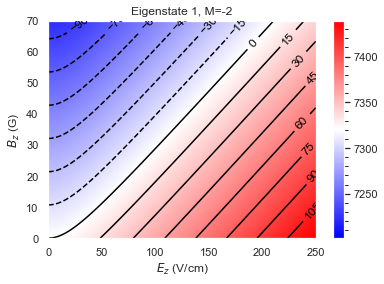

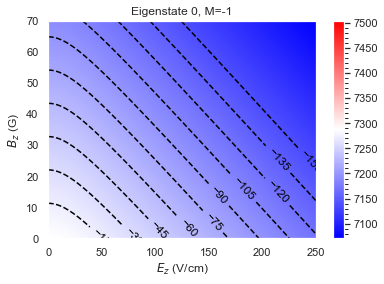

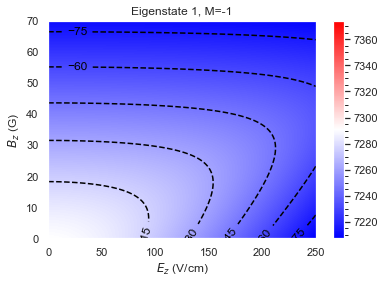

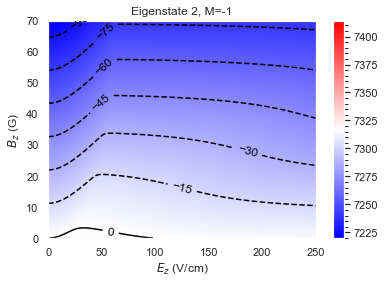

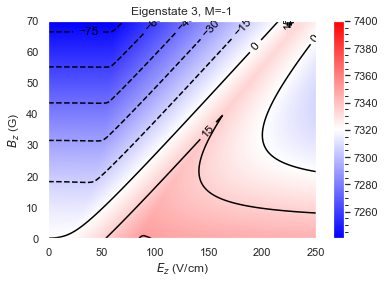

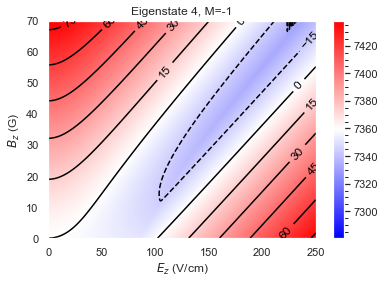

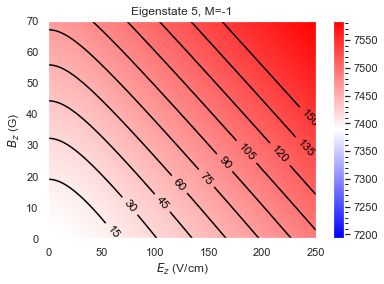

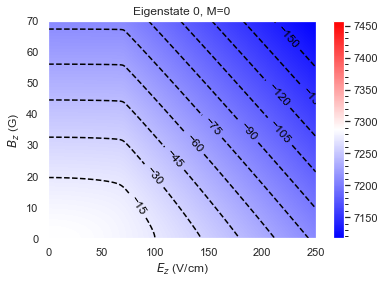

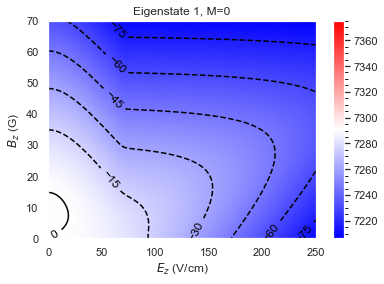

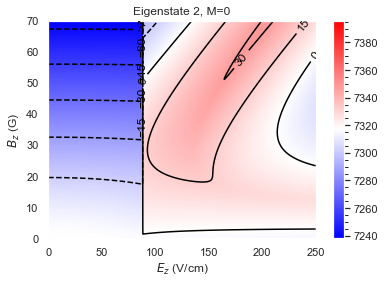

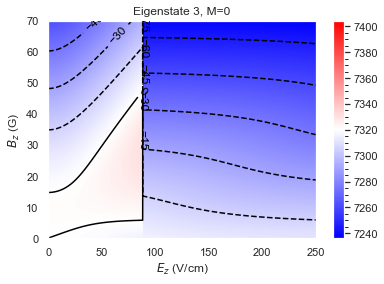

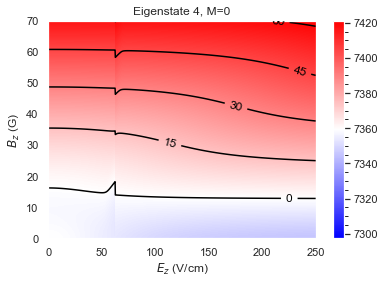

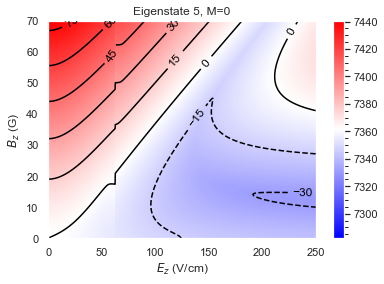

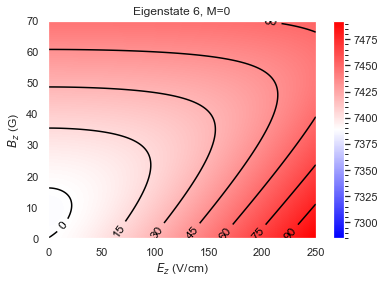

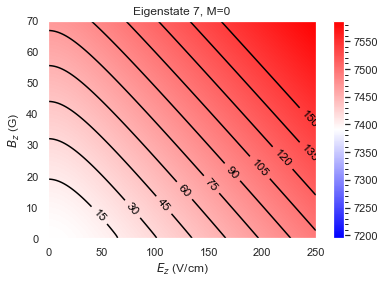

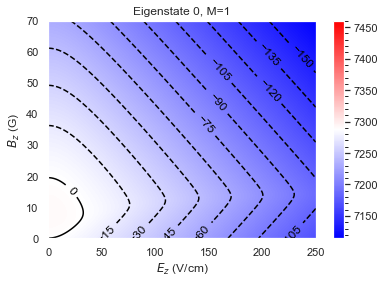

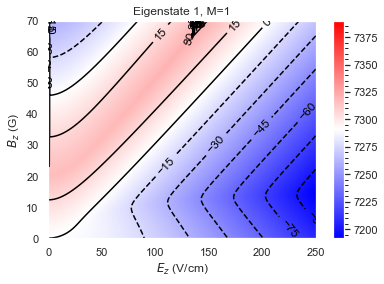

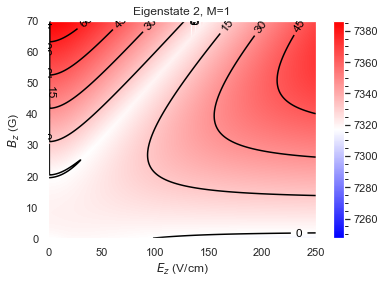

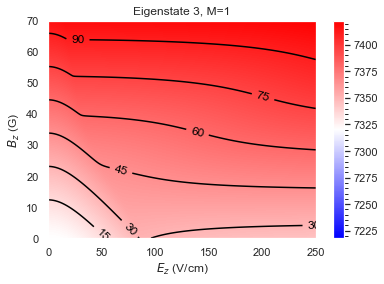

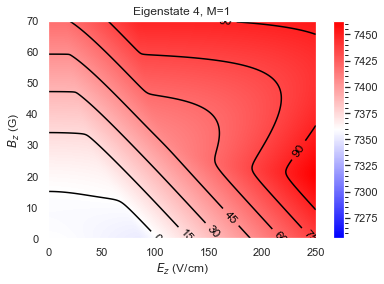

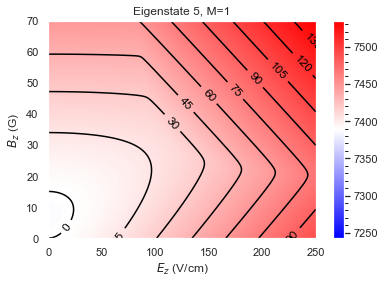

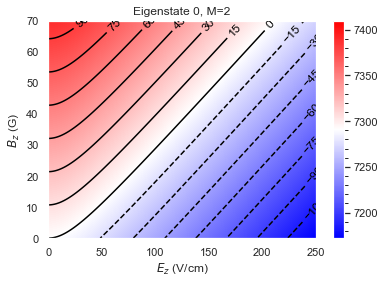

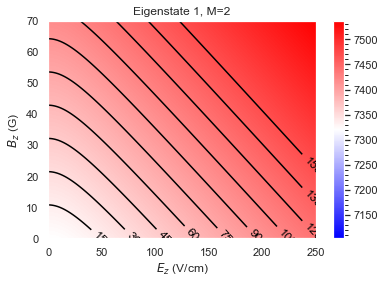

In [56]:
with_contour=True
for M in eval_dict.keys():
    print(M)
    evals_EB = eval_dict[M]
    for i in range(len(evals_EB)):
        plt.figure()
        E0 = evals_EB[i][0,0]
        max_delta = max(abs(evals_EB[i].max()-E0),abs(evals_EB[i].min()-E0))
        plt.grid(False)
        plt.pcolormesh(*mesh,evals_EB[i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=E0,vmin=E0-max_delta,vmax=E0+max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')
        if with_contour:
            try:
                conmap = plt.contour(*mesh,evals_EB[i]-E0,colors='black',levels=np.linspace(-150,150,21))#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")

In [58]:
state_dict[2].write_state(0)
state_dict[2].parities[0]

E = 7290.8001512341 MHz

 -0.7071067812 |K=-1,N=1,J=1.5,F=2.0,M=2.0> 

 0.7071067812 |K=1,N=1,J=1.5,F=2.0,M=2.0> 



-1.0

In [57]:
state_dict[-2].write_state(0)

E = 7290.7973487659 MHz

 -0.7071067812 |K=-1,N=1,J=1.5,F=2.0,M=-2.0> 

 0.7071067812 |K=1,N=1,J=1.5,F=2.0,M=-2.0> 



In [26]:
(Bz[-1]-Bz[-2])

0.01999950000000439

-2
-1
0
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_16268/3257776682.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_16268/3257776682.py:28: UserWarning: No contour levels were found within the data range.
  conmap = plt.contour(*mesh,geff_M/muBgS,colors='gold',levels=[0],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))


2


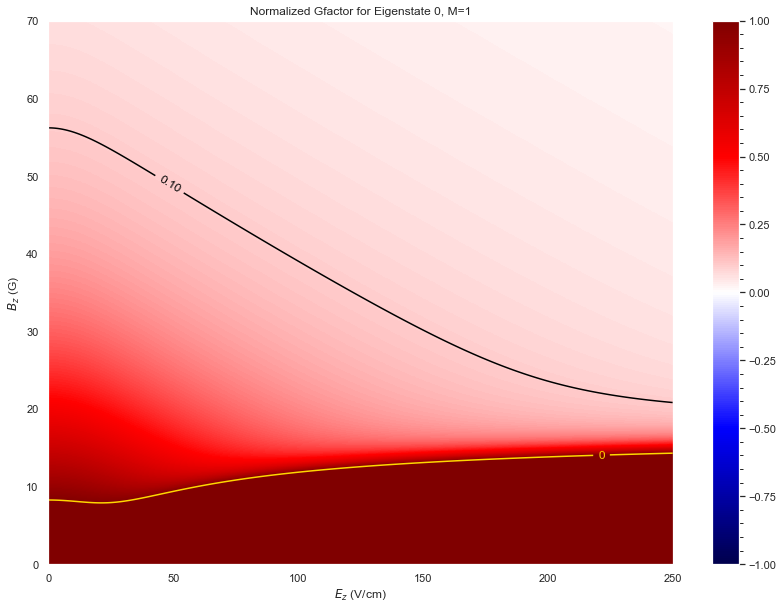

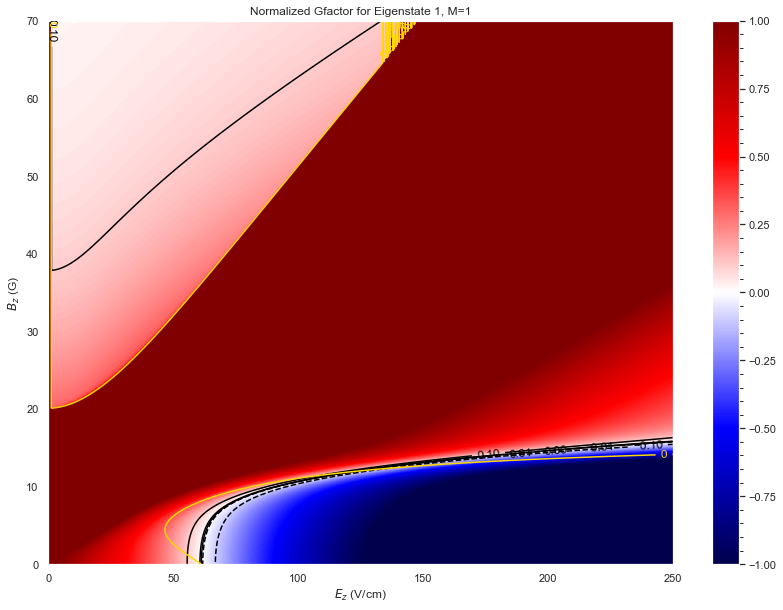

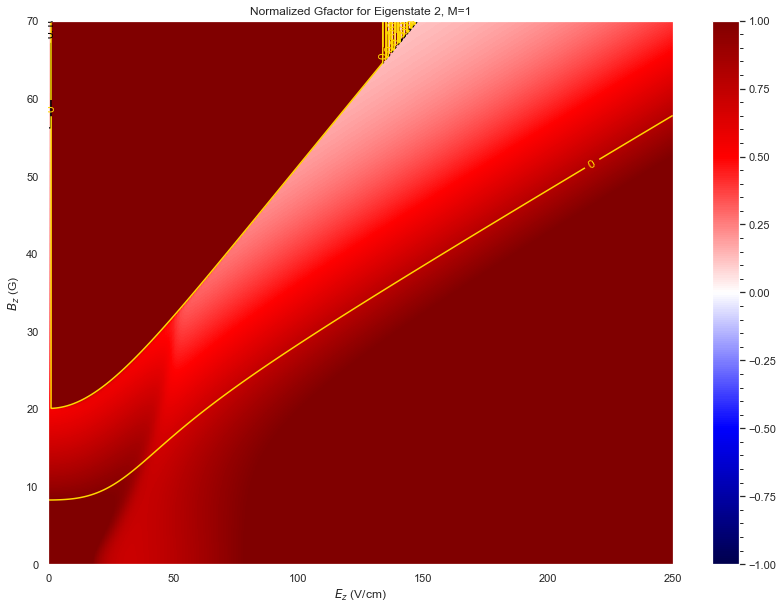

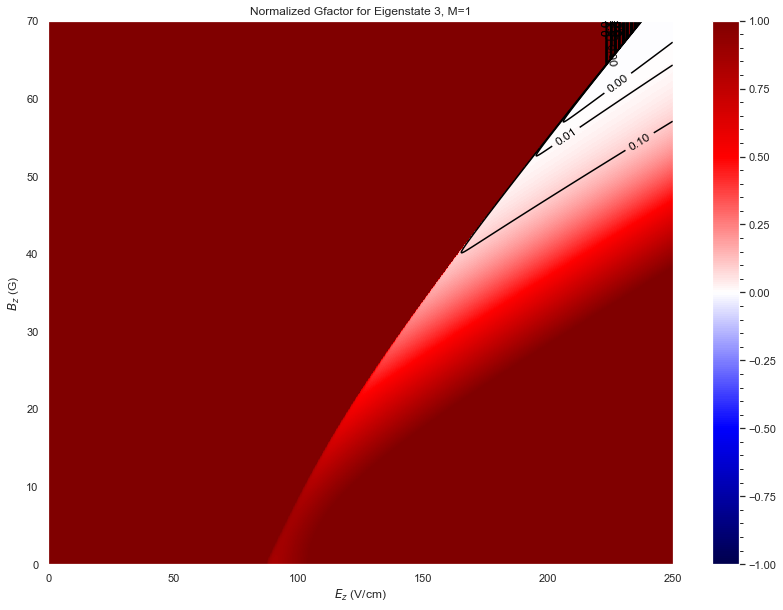

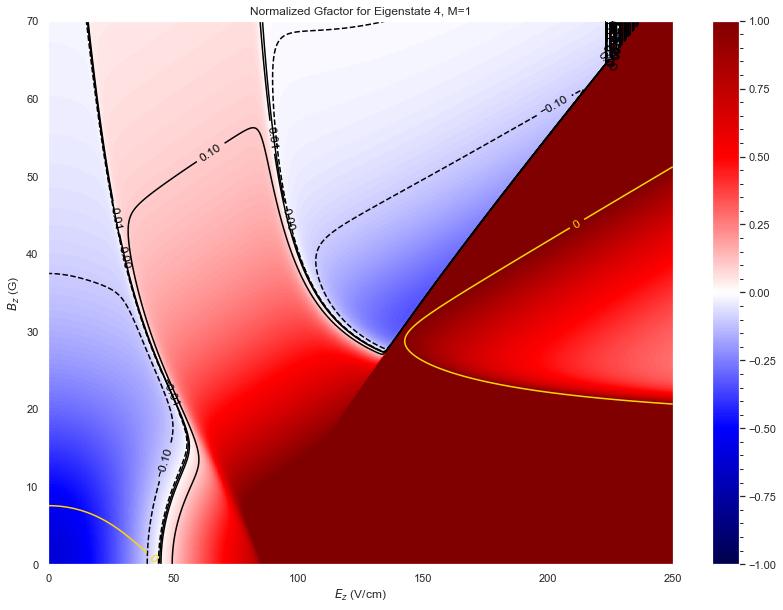

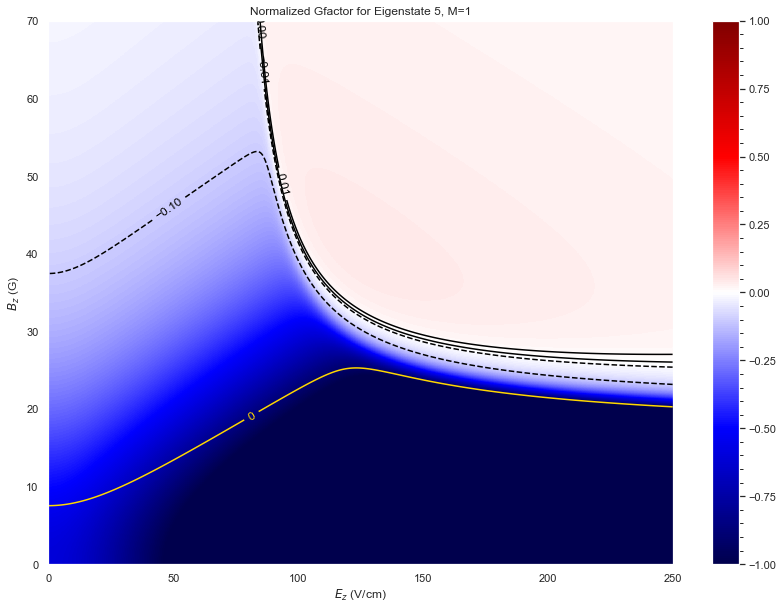

In [51]:
muBgS=1.399624494*2.0023/2
single = True
with_contour = True
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_M = eval_dict[M]
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_EB)):
        plt.figure(figsize=(14,10))
        geff = np.gradient(evals_EB[i])[1]/abs(Bz[-1]-Bz[-2])
        plt.grid(False)
        plt.pcolormesh(*mesh,geff/muBgS,shading='auto',cmap='seismic',norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))#,vmin=-1,vmax=1)
        cbar = plt.colorbar()
        cbar.minorticks_on()
        if with_contour:
            try:
                conmap = plt.contour(*mesh,geff/muBgS,colors='black',levels=[-0.1,-0.01,0,0.01,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
        if single:
            geff_M = np.gradient(evals_M[i])[1]/abs(Bz[-1]-Bz[-2])
            try:
                conmap = plt.contour(*mesh,geff_M/muBgS,colors='gold',levels=[0],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
        plt.title('Normalized Gfactor for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

In [85]:
state_dict[1].eigensystem(0,1e-3);

In [38]:
for i in [1,4]:
    state_dict[1].write_state(i)
    print(state_dict[1].parities[i],'\n')
    display(Latex(state_dict[1].gen_state_str(i,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'])))

E = 7290.7994506554 MHz

 -8.9025e-06 |K=-1,N=1,J=0.5,F=1.0,M=1.0> 

 8.9025e-06 |K=1,N=1,J=0.5,F=1.0,M=1.0> 

 -9.22719e-05 |K=-1,N=1,J=1.5,F=1.0,M=1.0> 

 9.22719e-05 |K=1,N=1,J=1.5,F=1.0,M=1.0> 

 -0.7071067751 |K=-1,N=1,J=1.5,F=2.0,M=1.0> 

 0.7071067751 |K=1,N=1,J=1.5,F=2.0,M=1.0> 

-1.0 



<IPython.core.display.Latex object>

E = 7359.2807633477 MHz

 -0.7067849324 |K=-1,N=1,J=0.5,F=1.0,M=1.0> 

 0.7067849324 |K=1,N=1,J=0.5,F=1.0,M=1.0> 

 -0.0213321152 |K=-1,N=1,J=1.5,F=1.0,M=1.0> 

 0.0213321152 |K=1,N=1,J=1.5,F=1.0,M=1.0> 

 1.16821e-05 |K=-1,N=1,J=1.5,F=2.0,M=1.0> 

 -1.16821e-05 |K=1,N=1,J=1.5,F=2.0,M=1.0> 

-1.0 



<IPython.core.display.Latex object>

-1
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_16268/2276810125.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


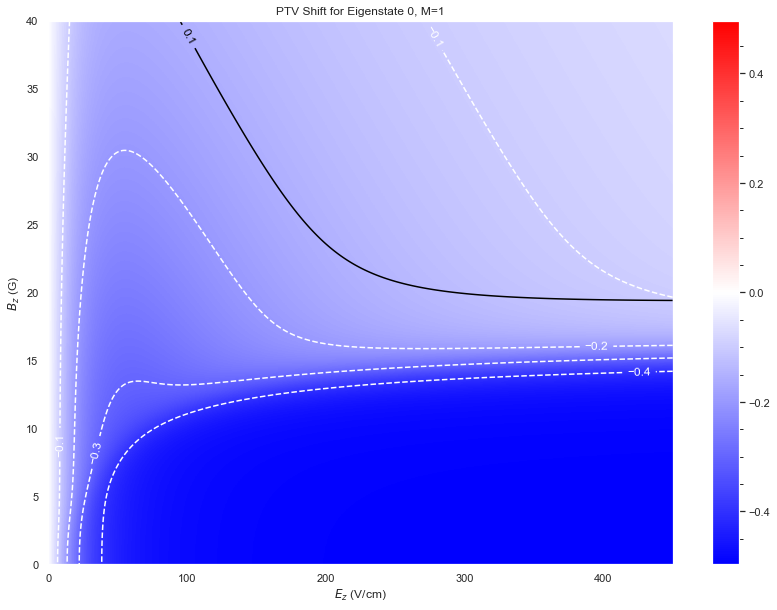

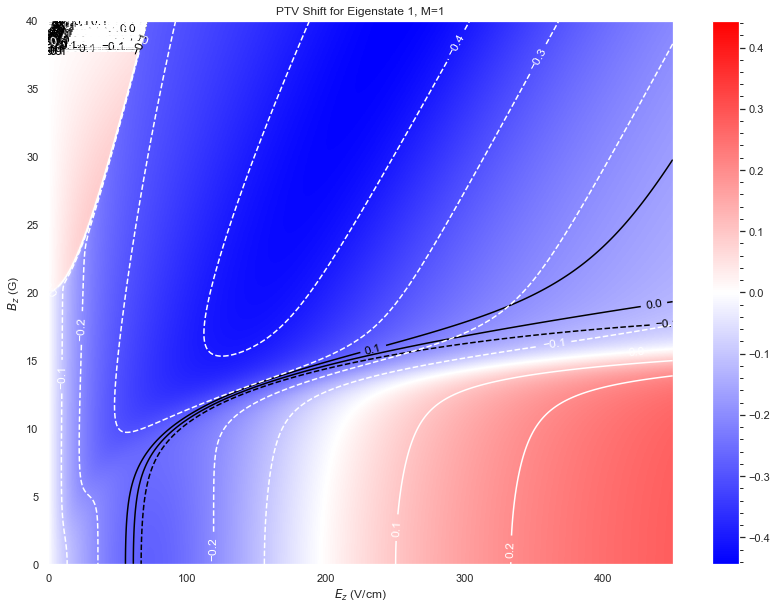

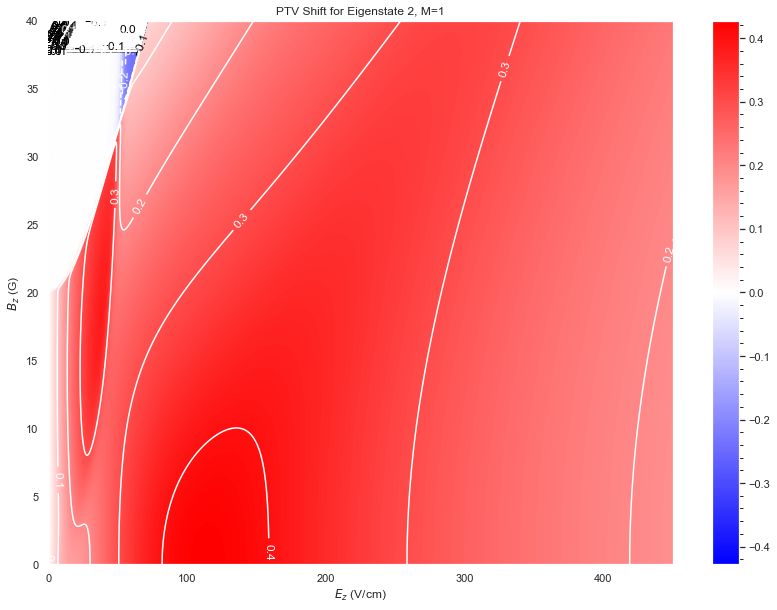

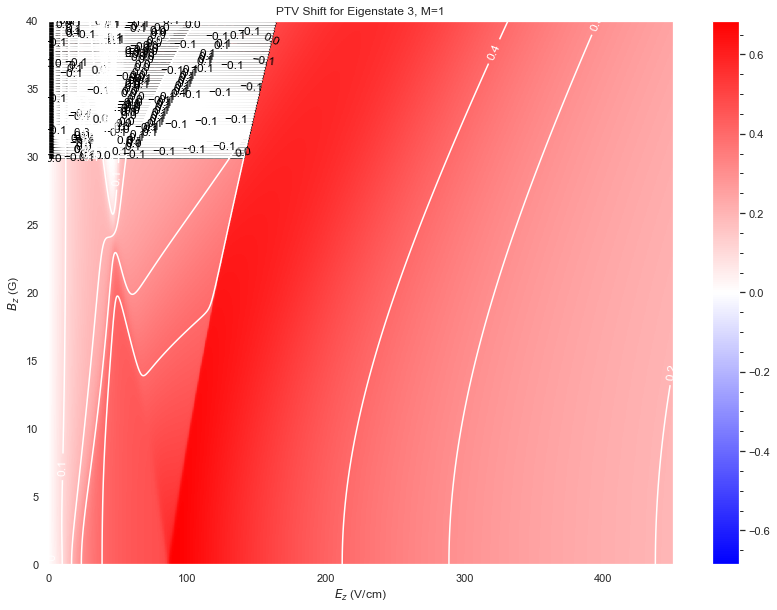

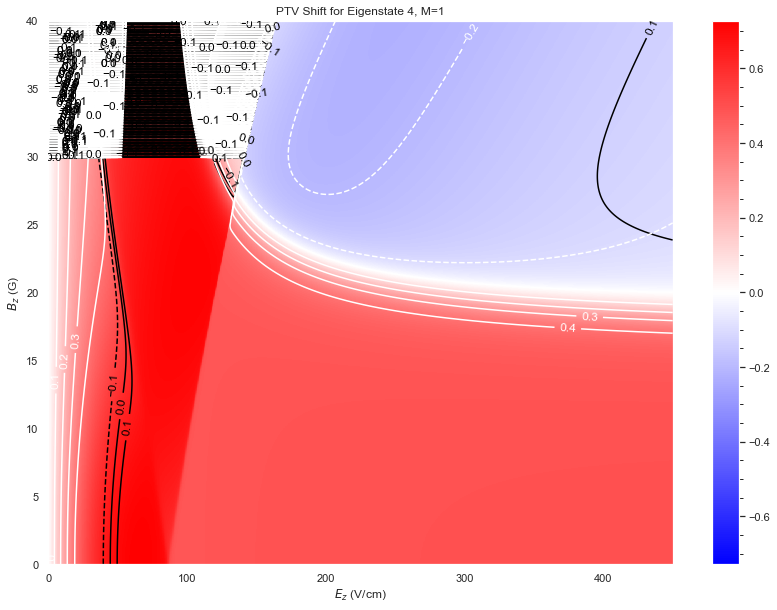

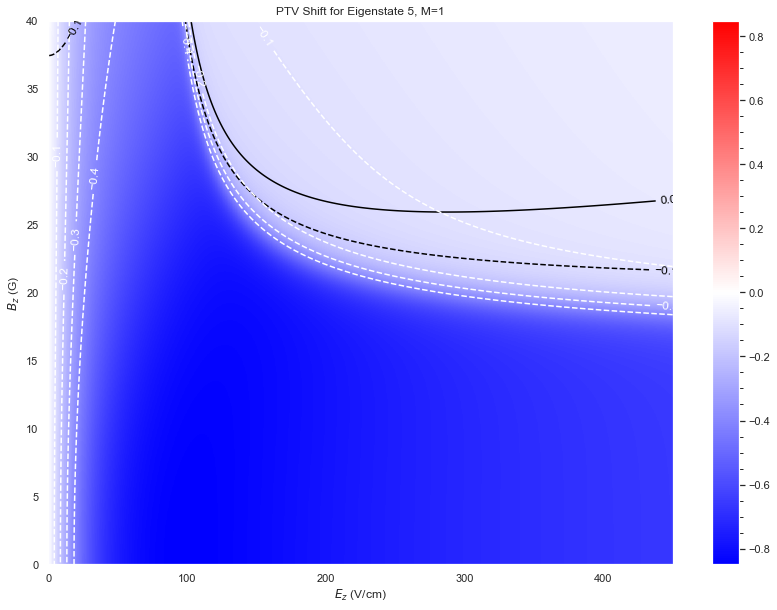

In [39]:
with_contour=True
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    PTV_EB = PTV_dict[M]-PTV_dict[-M]
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(PTV_EB)):
        plt.figure(figsize=(14,10))
        geff = np.gradient(evals_EB[i])[1]/abs(Bz[-1]-Bz[-2])
        PTV = PTV_EB[i]
        max_delta = max(abs(PTV.max()),abs(PTV.min()))
        plt.grid(False)
        plt.pcolormesh(*mesh,PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vmin=-max_delta,vcenter=0,vmax=max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('PTV Shift for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')
        if with_contour:
            try:
                conmap = plt.contour(*mesh,geff/muBgS,colors='black',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
            try:
                conmap = plt.contour(*mesh,PTV,colors='white',levels=[-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")

-1
1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  from ipykernel import kernelapp as app


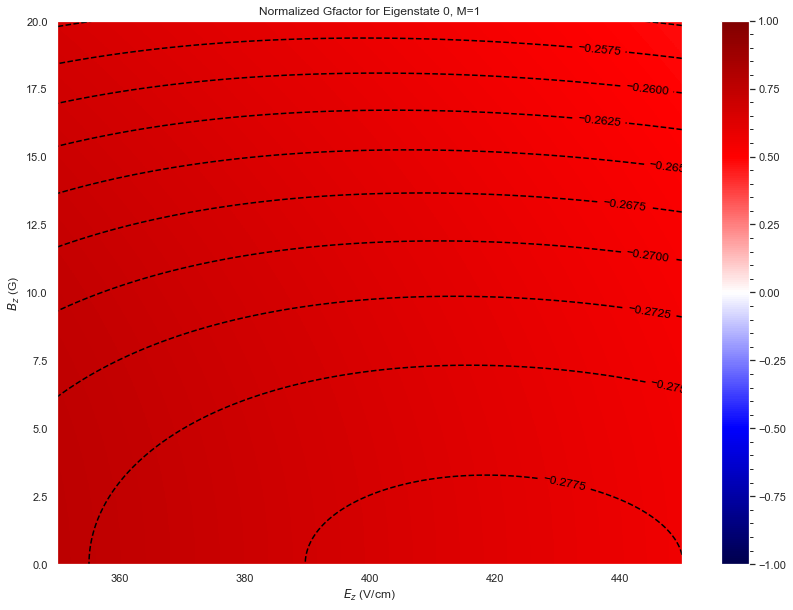

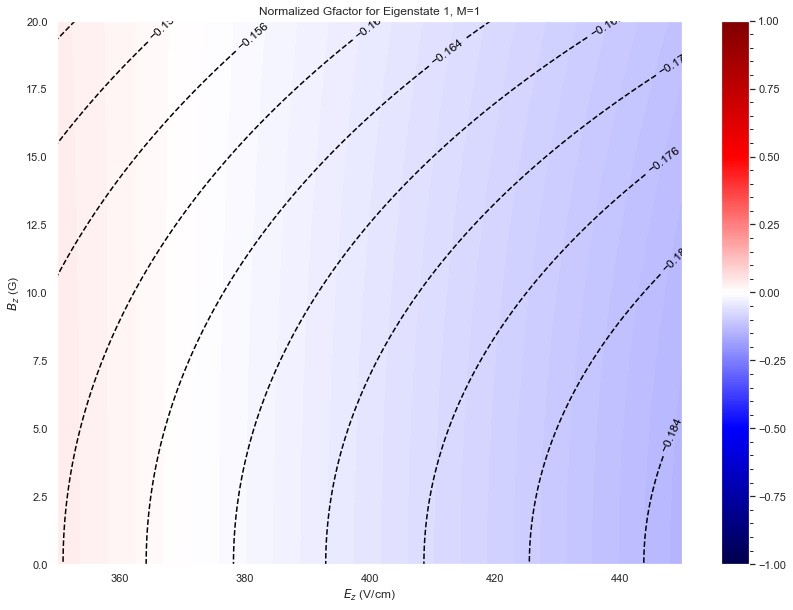

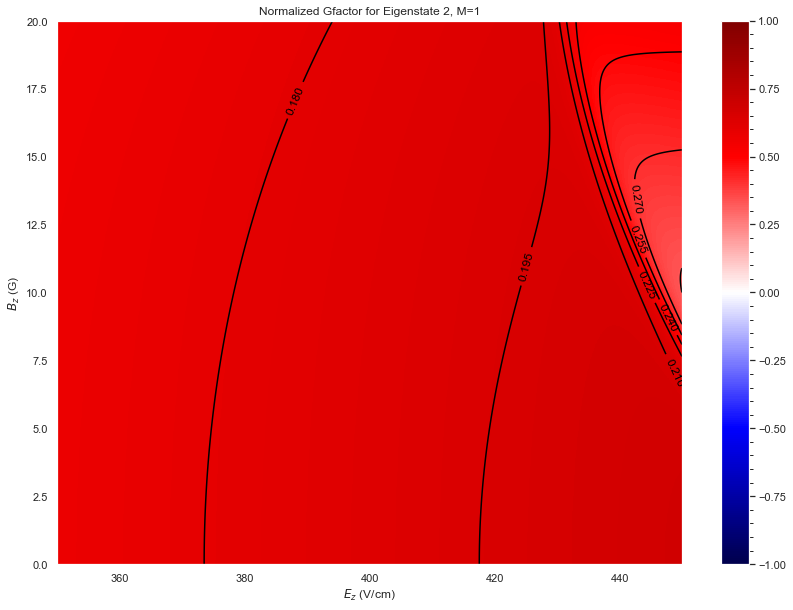

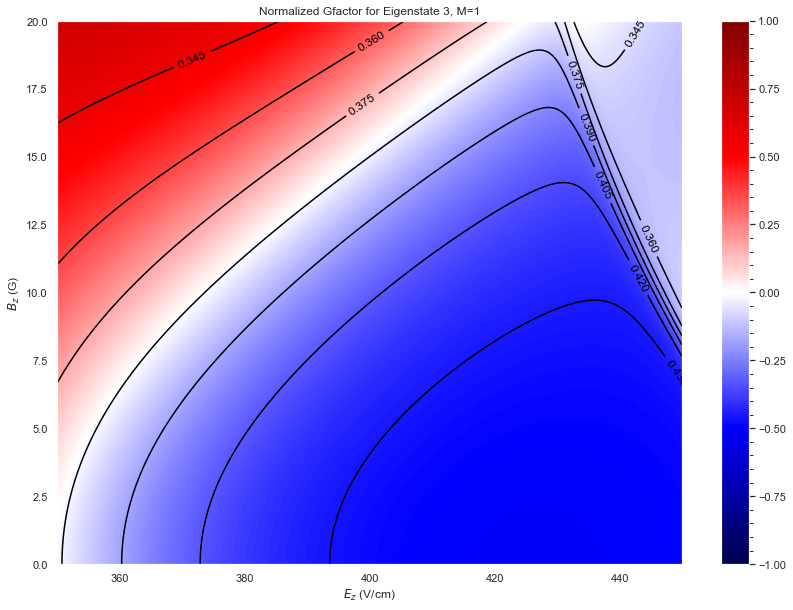

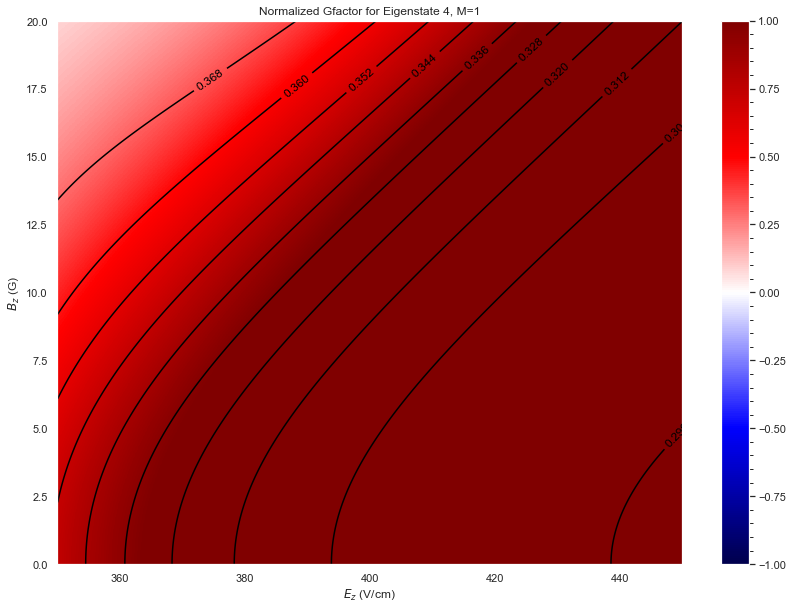

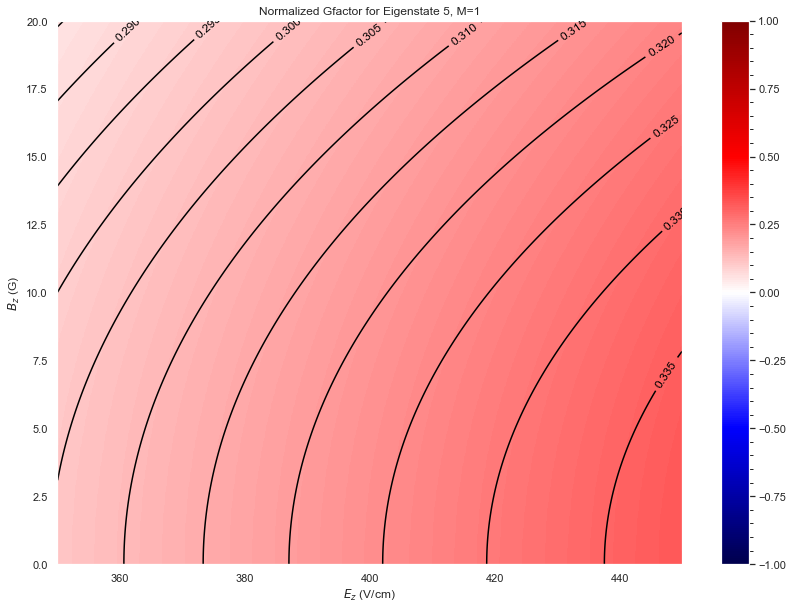

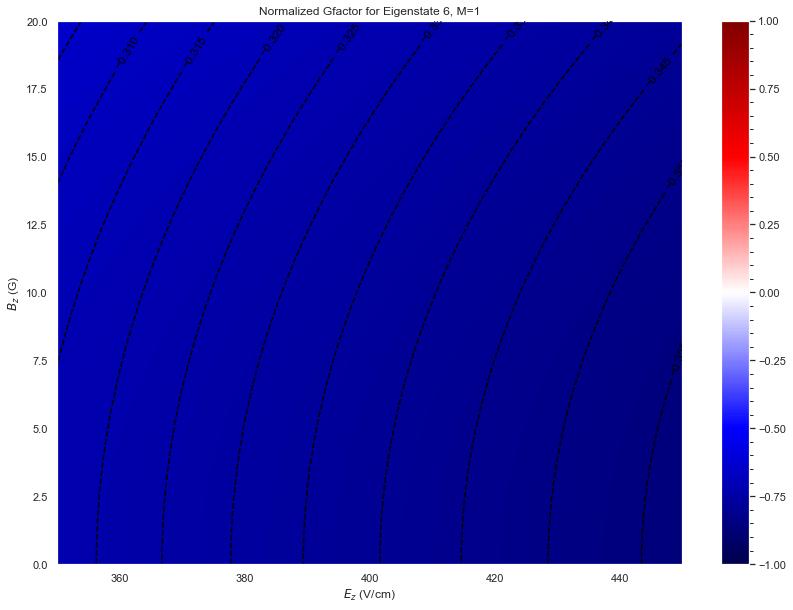

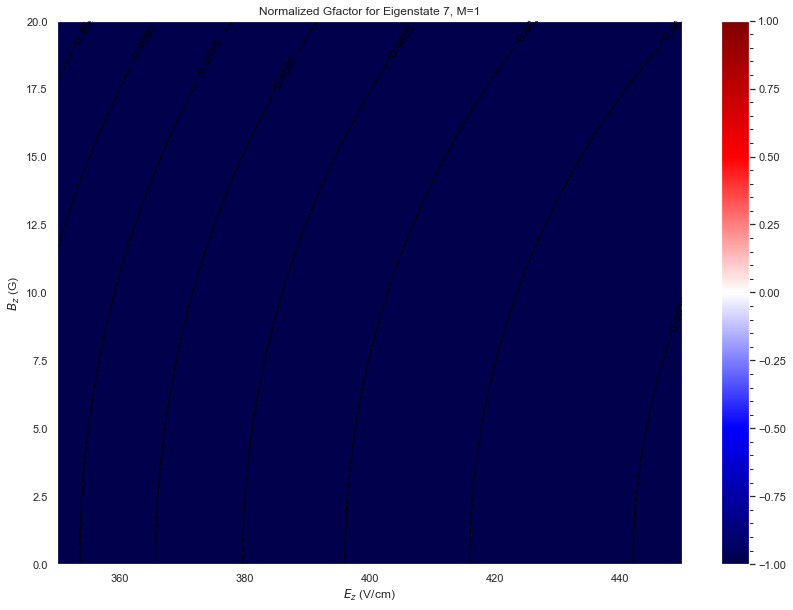

In [63]:
muBgS=1.399624494*2.0023/2
with_contour = True
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    PTV_EB = PTV_dict[M]-PTV_dict[-M]
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_EB)):
        plt.figure(figsize=(14,10))
        geff = np.gradient(evals_EB[i])[1]/abs(Bz[-1]-Bz[-2])
        PTV = PTV_EB[i]
        plt.grid(False)
        plt.pcolormesh(*mesh,geff/muBgS,shading='auto',cmap='seismic',norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))#,vmin=-1,vmax=1)
        cbar = plt.colorbar()
        cbar.minorticks_on()
        if with_contour:
#             try:
#                 conmap = plt.contour(*mesh,geff/muBgS,colors='black',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#                 plt.clabel(conmap, inline=True, fontsize=12)
#     #             cbar = plt.colorbar()
#     #             cbar.minorticks_on()
#             except ValueError:
#                 print("Can't plot this data")
            try:
                conmap = plt.contour(*mesh,PTV,colors='black',levels=10,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
        plt.title('Normalized Gfactor for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

In [42]:
evals_EB.shape

(2, 1201, 1001)

In [159]:
np.searchsorted(Ez,390)

1950

In [164]:
np.argmin(abs(np.gradient(evals_EB[7])[1][:,0]))

2241

In [64]:
Ez = mesh[0,:,0]
Bz = mesh[1,0,:]

In [65]:
from scipy.optimize import curve_fit

def fitFunction(xscale,data,function,guess,sigma,plot,bounds=None):
    xscale = np.array(xscale)
    data = np.array(data)
    guess = np.array(guess).astype(float)
    if bounds==None:
        bounds = (-np.inf,np.inf)
    try:
        popt,pcov = curve_fit(function,xscale,data,p0=guess,sigma=sigma,bounds=bounds)
        perr = np.round(np.sqrt((np.diag(pcov))),decimals=6)
        params = np.round(popt,decimals=6)
        fit = function(xscale,*popt)
        residuals = data - fit
        if plot:
            plotFitComparison(xscale,data,function,params,sigma)
            plotFitResiduals(xscale,residuals,sigma)
    except RuntimeError:
        print("Error - curve_fit failed")
        print(guess)
        plt.figure()
        plt.plot(xscale,data)
        plt.plot(xscale,function(xscale,*guess))
        params = []
        perr = []
        residuals = []
    return [params,perr,residuals]

def plotFitComparison(xscale,data,function,params,sigma,xlabel=None,ylabel=None):
    plt.figure()
    plt.title('Fit vs Data')
    if sigma is None:
        plt.plot(xscale,data,label='Data',marker='o')
    else:
        plt.errorbar(xscale,data,yerr=sigma,label='Data',marker='o',linestyle='None')
    plt.plot(xscale,function(xscale,*params),label='Fit')
    return

def plotFitResiduals(xscale,residuals,sigma):
    plt.figure()
    plt.title('Fit Residuals')
    if sigma is None:
        plt.plot(xscale,residuals,'o',linestyle='None')
    else:
        plt.errorbar(xscale,residuals,yerr=sigma,marker='o',linestyle='None')
    plt.plot(xscale,np.zeros(len(xscale)),linestyle='--')
    return

def quadratic(x,a,b):
    return a*x**2+b

def line(x,m,b):
    return m*x+b

def fitQuad(xscale, data,guess=[1,0],sigma=None,plot=True,verbose=False):
    function = quadratic
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot)
    if verbose:
        print('a = {} +/- {}'.format(params[0],error[0]))
        print('b = {} +/- {}'.format(params[1],error[1]))
    return [params,error,residuals]

def fitLine(xscale, data,guess=[1,0],sigma=None,plot=True,verbose=False):
    function = line
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot)
    if verbose:
        print('m = {} +/- {}'.format(params[0],error[0]))
        print('b = {} +/- {}'.format(params[1],error[1]))
    return [params,error,residuals]

-1
1
371.4


Text(0.5, 1.0, 'Differential g-Factor, N=1,J=1/2+ M=1/-1')

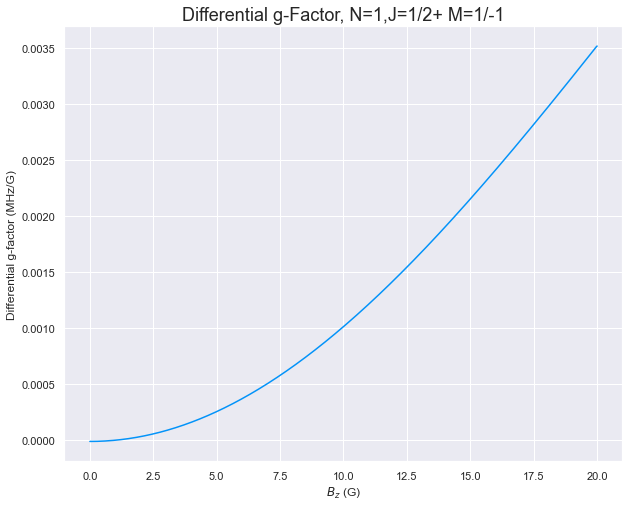

In [66]:
plt.figure(figsize=(10,8))
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_EB)):
        if i not in [1]:
            continue
        EB = evals_EB[i]
        iE = np.argmin(abs(np.gradient(EB)[1][:,0]))
        print(Ez[iE])
        plt.plot(Bz,np.gradient(EB)[1][iE,:]/(Bz[-1]-Bz[-2]))
#         plt.xlabel(r'$E_z$ (V/cm)')
plt.xlabel(r'$B_z$ (G)')
plt.ylabel('Differential g-factor (MHz/G)')
plt.title('Differential g-Factor, N=1,J=1/2+ M=1/-1',fontsize=18)

a = 1e-05 +/- 0.0
b = 2e-06 +/- 0.0


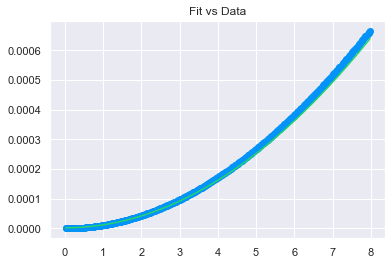

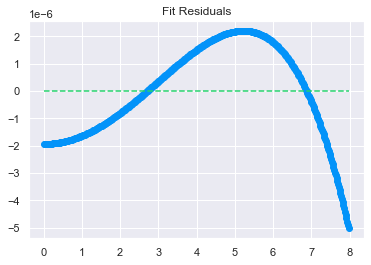

In [70]:
gE = (np.gradient(EB)[1][iE,1:400])/(Bz[-1]-Bz[-2])
params,err,resid = fitQuad(Bz[1:400],(gE-gE[0]),verbose=True)

m = -0.002478 +/- 0.0
b = 0.920249 +/- 0.00014


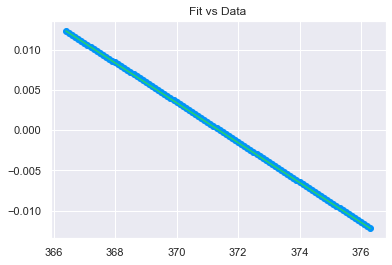

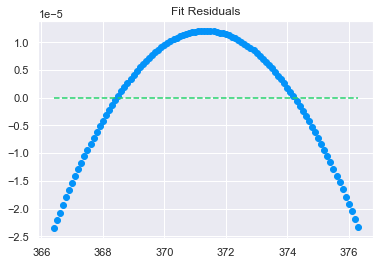

In [71]:
params,err,resid = fitLine(Ez[iE-50:iE+50],(np.gradient(EB)[1][iE-50:iE+50,0])/(Bz[-1]-Bz[-2]),verbose=True)

-1
1
60.79999999999586
Slope = 0.031908400342224676 /(V/cm)


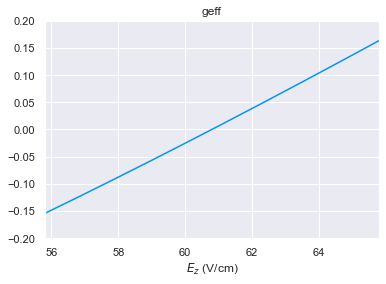

In [46]:
plt.figure()
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_EB)):
        if i not in [3]:
            continue
        EB = evals_EB[i]
        iE = np.argmin(abs(np.gradient(EB)[1][:,0]))
        print(Ez[iE])
        plt.plot(Ez,np.gradient(EB)[1][:,0]/(Bz[-1]-Bz[-2]))
#         plt.xlabel(r'$E_z$ (V/cm)')
plt.xlabel(r'$E_z$ (V/cm)')
plt.title('geff')
plt.xlim(55.8,65.8)
plt.ylim(-0.2,0.2)
slope = ((np.gradient(EB)[1][iE+100,0]-np.gradient(EB)[1][iE-100,0])/(Bz[-1]-Bz[-2]))/(Ez[iE+100]-Ez[iE-100])
print('Slope =',slope,'/(V/cm)')

In [42]:
((np.gradient(EB)[1][iE+100,0]-np.gradient(EB)[1][iE-100,0])/(Bz[-1]-Bz[-2]))/(Ez[iE+100]-Ez[iE-100])

0.031908400342224676

In [57]:
np.gradient(EB)[0].shape

(1201, 1001)

In [96]:
eval_dict[0][3]-eval_dict[0][4]

array([[-15.94271, -15.94267, -15.94257, ..., -11.09706, -11.12208,
        -11.1471 ],
       [-15.94304, -15.943  , -15.9429 , ..., -11.09697, -11.12198,
        -11.147  ],
       [-15.94403, -15.944  , -15.9439 , ..., -11.09667, -11.12169,
        -11.14671],
       ...,
       [-40.21951, -40.21936, -40.21894, ..., -12.61294, -12.64068,
        -12.66841],
       [-40.21984, -40.2197 , -40.21928, ..., -12.61309, -12.64083,
        -12.66857],
       [-40.22018, -40.22004, -40.21962, ..., -12.61325, -12.64098,
        -12.66872]])

In [164]:
d = eval_dict[0][3]-eval_dict[0][4]
(abs(d)<0.1).any()

True

In [141]:
x = np.zeros((100,100))
y = np.zeros((100,100))+1
y[3:5,20:80] = 1

In [142]:
d = x-y
testmesh = np.array(np.meshgrid(np.arange(100),np.arange(100),indexing='ij'))

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1015796236.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

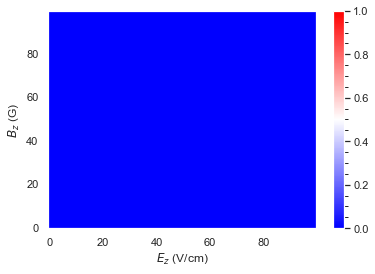

In [143]:
plt.figure()
plt.grid(False)
plt.pcolormesh(*testmesh,abs(d)<0.1,shading='auto',cmap='bwr',vmin=0,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

In [154]:
(abs(d)<0.1).nonzero()[0].size

0

In [158]:
len(eval_dict.keys())

5

In [44]:
E_thresh = 0.001
PTV_thresh = 0.05
geff_thresh = 1e-2
Ez_idx_match = []
Bz_idx_match = []
eigenstate_match = []
M_match = []
M_list = list(eval_dict.keys())
for Midx in range(len(M_list)):
    Mi = M_list[Midx]
    for Mjdx in range(Midx,len(M_list)):
        Mj = M_list[Mjdx]
        if abs(Mi-Mj)>2:
            continue
        else:
            evals_Mi = eval_dict[Mi]
            evals_Mj = eval_dict[Mj]
            PTV_Mi = PTV_dict[Mi]
            PTV_Mj = PTV_dict[Mj]
            for i in range(len(evals_Mi)):
                for j in range(i,len(evals_Mj)):
                    if i==j and Mi==Mj:
                        continue
                    deltaE_ij = evals_Mi[i]-evals_Mj[j]
                    E_bool_match = (abs(deltaE_ij)<E_thresh)
                    if E_bool_match.any():
                        geff_i = np.gradient(evals_Mi[i])[1]/(Bz[1]-Bz[0])
                        geff_j = np.gradient(evals_Mj[j])[1]/(Bz[1]-Bz[0])
                        deltag_ij = geff_i - geff_j
                        g_bool_match = np.logical_and(abs(deltag_ij)<geff_thresh, E_bool_match)
                        if g_bool_match.any():
                            PTV_i = PTV_Mi[i]
                            PTV_j = PTV_Mj[j]
                            deltaPTV_ij = PTV_i - PTV_j
                            PTV_bool_match = np.logical_and(abs(deltaPTV_ij)>PTV_thresh, g_bool_match)
                            if PTV_bool_match.any():
                                #Found a match!
                                idx_match = PTV_bool_match.nonzero()
                                print('Found a match!')
                                print('i = {}, Mi = {}'.format(i,Mi))
                                print('j = {}, Mj = {}'.format(j,Mj))
                                print('Ez vals = {}'.format((Ez[idx_match[0]].min(),Ez[idx_match[0]].max())))
                                print('Bz vals = {}'.format((Bz[idx_match[1]].min(),Bz[idx_match[1]].max())))
                                print('delta geff = {}'.format(deltag_ij[idx_match]))
                                print('delta PTV = {}'.format(deltaPTV_ij[idx_match]))
                                Ez_idx_match.append(idx_match[0])
                                Bz_idx_match.append(idx_match[1])
                                eigenstate_match.append([i,j])
                                M_match.append([Mi,Mj])

Found a match!
i = 1, Mi = -1
j = 1, Mj = 1
Ez vals = (61.2, 61.65)
Bz vals = (0.001, 0.680983)
delta geff = [-0.00117 -0.00117 -0.00118 -0.00118 -0.00119 -0.00119 -0.0012  -0.00121
 -0.00122 -0.00123 -0.00125 -0.00126 -0.00128 -0.0013  -0.00132 -0.00134
 -0.00137 -0.00139 -0.00142 -0.00144 -0.00147 -0.0015  -0.00154 -0.00157
 -0.0016  -0.00164 -0.00168 -0.00172 -0.00176 -0.0018  -0.00185 -0.00189
 -0.00194 -0.00199 -0.00204  0.01   ]
delta PTV = [0.26754 0.26754 0.26754 0.26753 0.26753 0.26753 0.26753 0.26753 0.26752
 0.26752 0.26751 0.26751 0.2675  0.2675  0.26749 0.26749 0.26748 0.26747
 0.26746 0.26746 0.26745 0.26744 0.26743 0.26742 0.26741 0.2674  0.26739
 0.26737 0.26736 0.26735 0.26734 0.26732 0.26731 0.26729 0.26728 0.26809]
Found a match!
i = 4, Mi = -1
j = 4, Mj = 1
Ez vals = (44.550000000000004, 44.550000000000004)
Bz vals = (0.001, 0.5809855)
delta geff = [0.00153 0.00153 0.00153 0.00154 0.00154 0.00155 0.00156 0.00156 0.00157
 0.00159 0.0016  0.00161 0.00163 0.00164 0.001

In [25]:
Bz[Bz_idx_match[0]].min

<function ndarray.min>

In [15]:
for i in [1,2,3,4,5]:
    print('P=',state_dict[1].parities[i])
    state_dict[1].write_state(i)

P= 1.0
E = 36517.4317266823 MHz

 -1.2e-09 |K=-1,N=2,J=1.5,F=1.0,M=1.0> 

 5.7e-09 |K=1,N=2,J=1.5,F=1.0,M=1.0> 

 1.62074e-05 |K=-1,N=2,J=1.5,F=2.0,M=1.0> 

 2.38863e-05 |K=1,N=2,J=1.5,F=2.0,M=1.0> 

 -1.6615e-05 |K=-1,N=2,J=2.5,F=2.0,M=1.0> 

 0.0001255744 |K=1,N=2,J=2.5,F=2.0,M=1.0> 

 -0.7070124773 |K=-1,N=2,J=2.5,F=3.0,M=1.0> 

 0.7072010606 |K=1,N=2,J=2.5,F=3.0,M=1.0> 

P= -1.0
E = 36603.17381357 MHz

 -4.36875e-05 |K=-1,N=2,J=1.5,F=1.0,M=1.0> 

 5.21764e-05 |K=1,N=2,J=1.5,F=1.0,M=1.0> 

 -0.0088374378 |K=-1,N=2,J=1.5,F=2.0,M=1.0> 

 -0.0088530449 |K=1,N=2,J=1.5,F=2.0,M=1.0> 

 0.7071838284 |K=-1,N=2,J=2.5,F=2.0,M=1.0> 

 0.7069190443 |K=1,N=2,J=2.5,F=2.0,M=1.0> 

 -1.79497e-05 |K=-1,N=2,J=2.5,F=3.0,M=1.0> 

 -0.0001263531 |K=1,N=2,J=2.5,F=3.0,M=1.0> 

P= -1.0
E = 36605.9437303989 MHz

 -3.8e-09 |K=-1,N=2,J=1.5,F=1.0,M=1.0> 

 6.2e-09 |K=1,N=2,J=1.5,F=1.0,M=1.0> 

 -5.25585e-05 |K=-1,N=2,J=1.5,F=2.0,M=1.0> 

 6.02012e-05 |K=1,N=2,J=1.5,F=2.0,M=1.0> 

 0.0001224221 |K=-1,N=2,J=2.5,

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_11232/295935719.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_11232/295935719.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

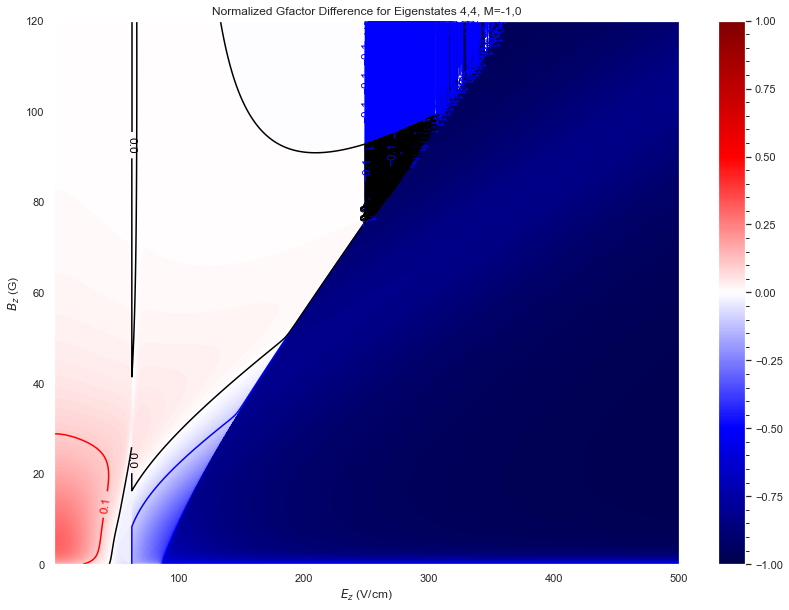

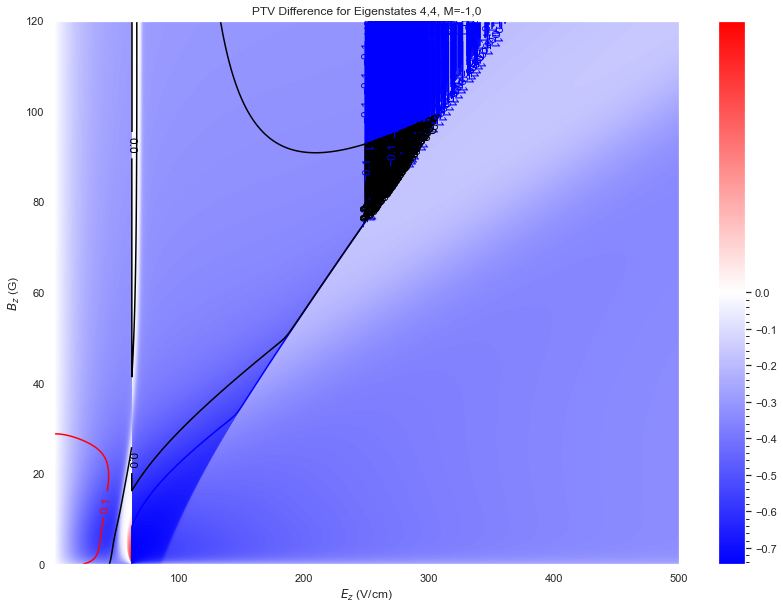

In [13]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 4
evals_1 = eval_dict[-1][idx]
evals_2 = eval_dict[0][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/(2*muBgS),shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=-1,0'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[-1][idx]
PTV_2 = PTV_dict[0][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=0.0))
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=-1,0'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_13244/1796785351.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_13244/1796785351.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

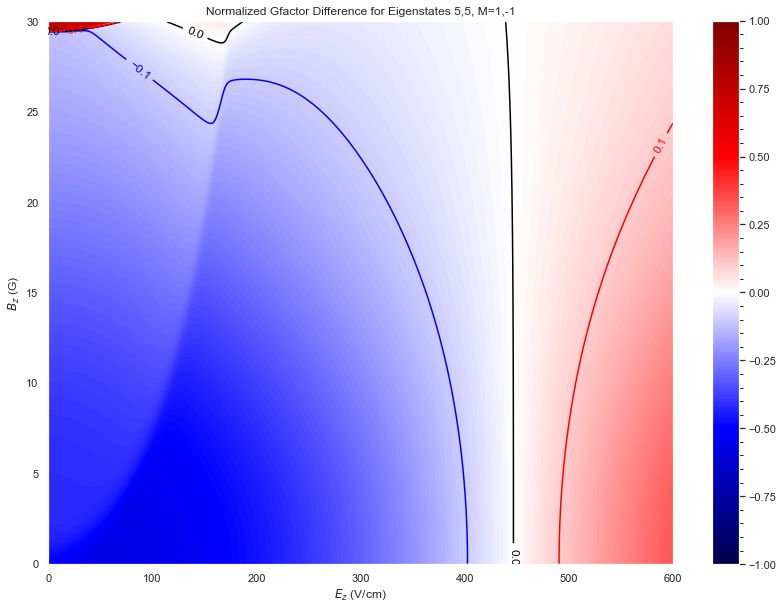

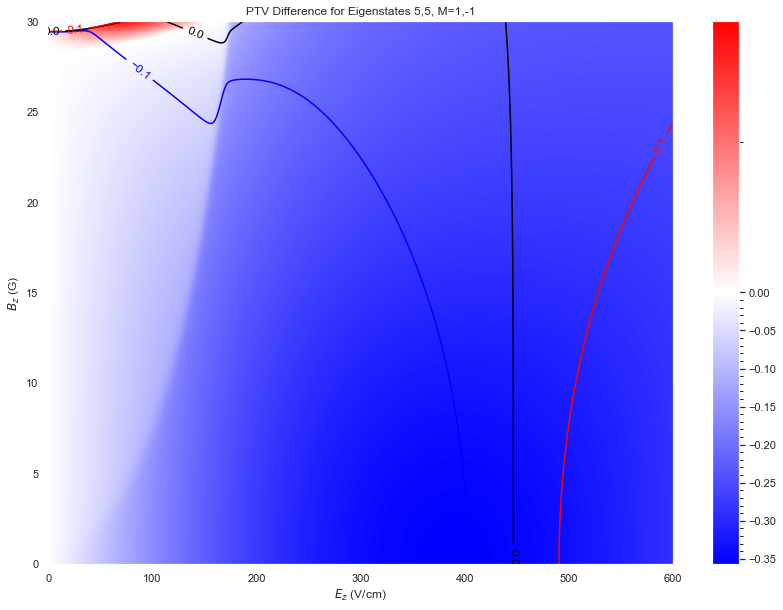

In [191]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 5
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/(2*muBgS),shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=0.0))
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1155249723.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1155249723.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

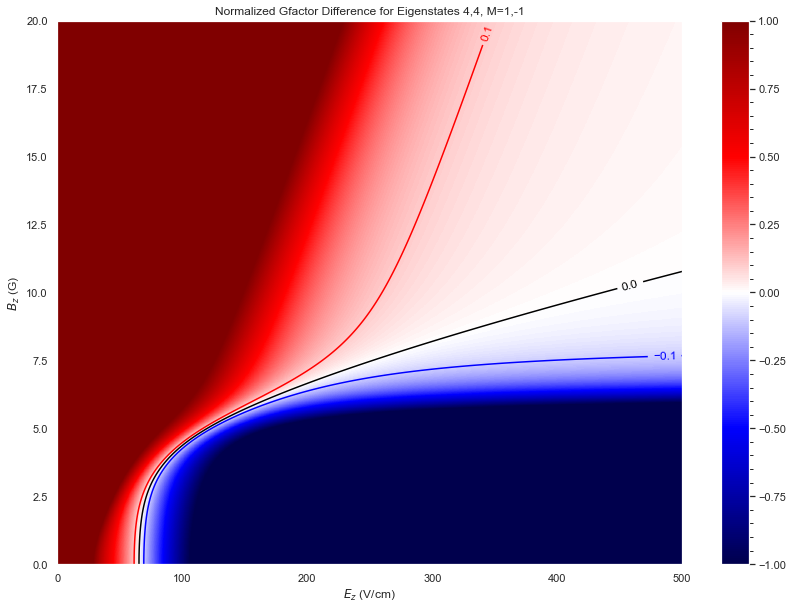

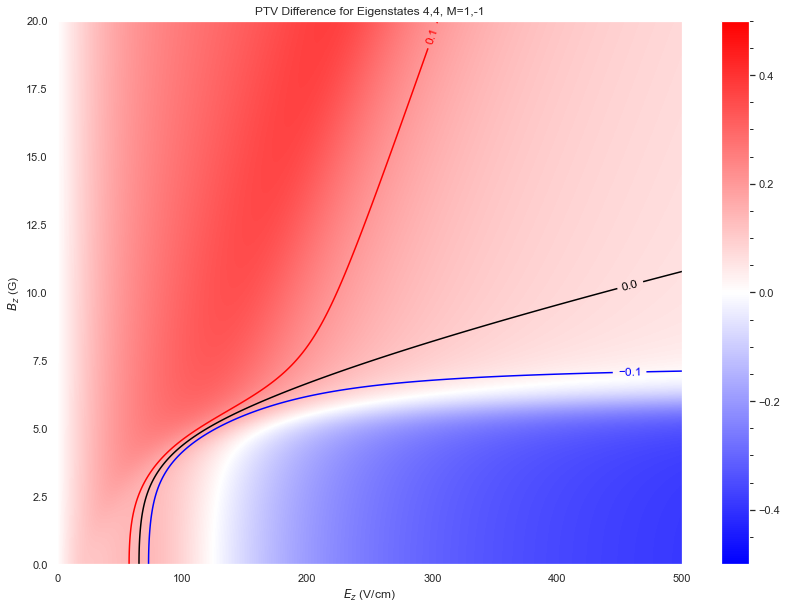

In [372]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/muBgS,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',vmin=-0.5,vmax=0.5)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

In [270]:
Em = np.searchsorted(Ez,40)
Em

160

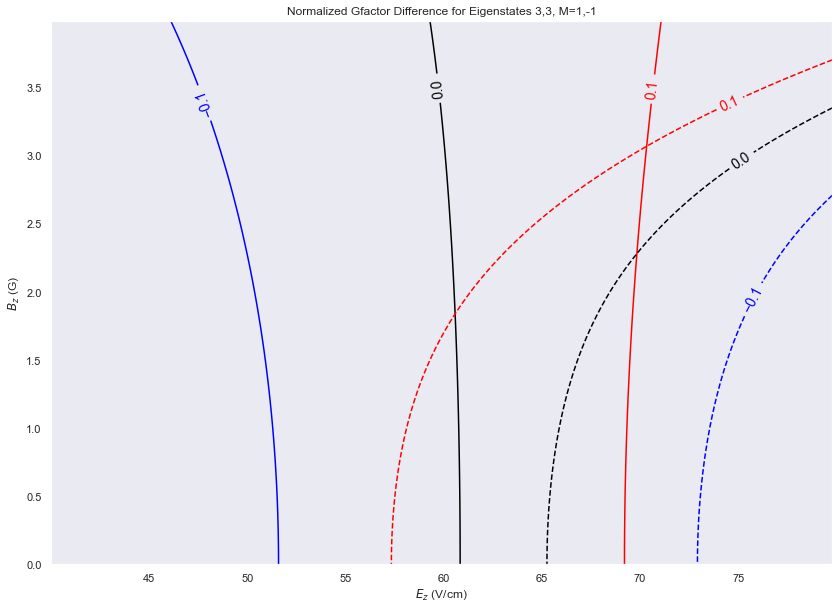

In [377]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5, fontsize=14,rightside_up=False,manual=[(50,3.5),(60,3.5),(70,3.5)])
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5,fontsize=14,rightside_up=True,manual=[(75,3.25),(75,3),(75,2)])
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

In [392]:
np.linspace(-0.1,0.1,21)

array([-0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ])

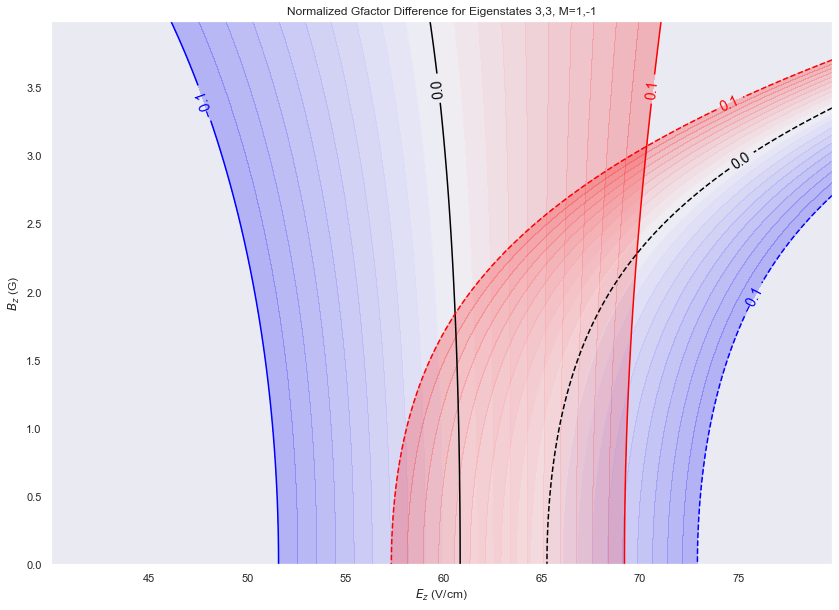

In [393]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# PTV_1 = PTV_dict[1][idx]
# PTV_2 = PTV_dict[-1][idx]
# delta_PTV = PTV_1 - PTV_2
# plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5,manual=[(50,3.5),(60,3.5),(70,3.5)], fontsize=14,rightside_up=False)
        smallmap1 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5, manual=[(75,3.25),(75,3),(75,2)],fontsize=14,rightside_up=True)
        smallmap2 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',linestyles='dashed',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

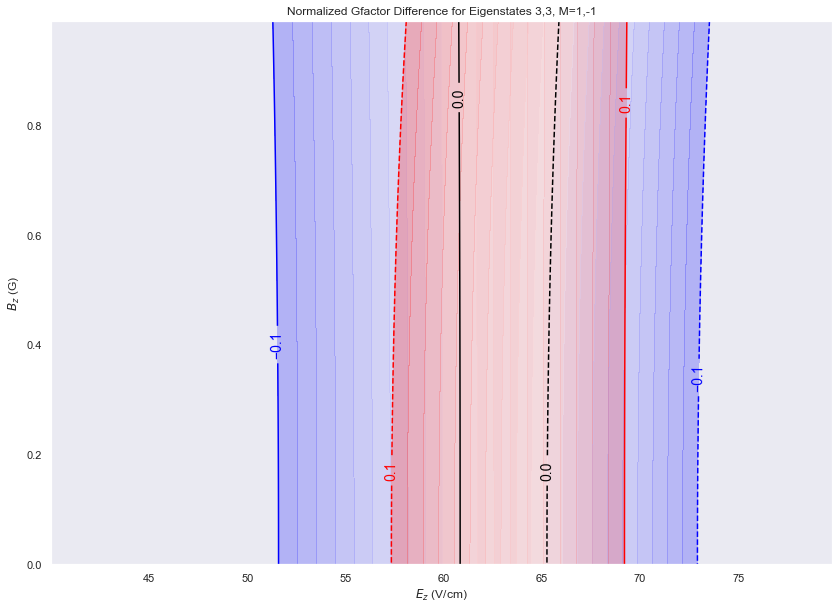

In [394]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,1)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# PTV_1 = PTV_dict[1][idx]
# PTV_2 = PTV_dict[-1][idx]
# delta_PTV = PTV_1 - PTV_2
# plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5, fontsize=14,rightside_up=False)
        smallmap1 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5,fontsize=14,rightside_up=True)
        smallmap2 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',linestyles='dashed',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/3213161298.py:42: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


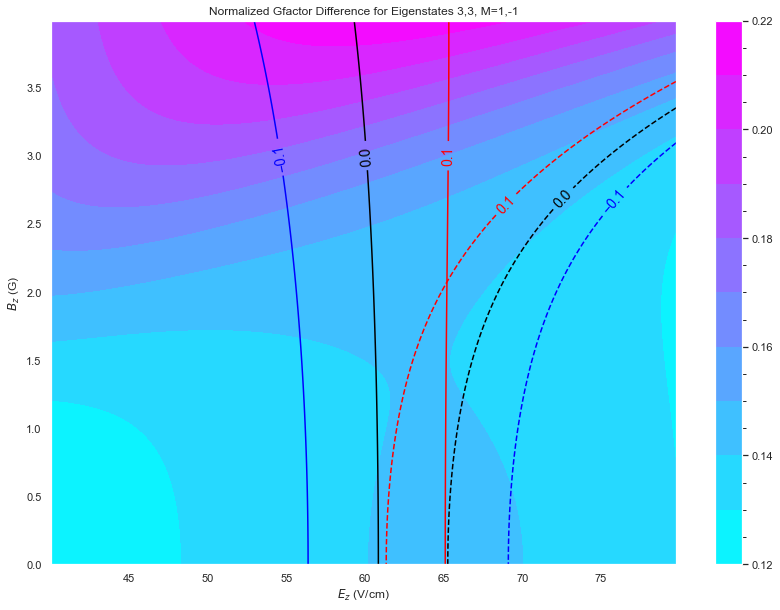

In [305]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5,manual=[(55,3),(60,3),(65,3)], fontsize=14,rightside_up=False)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
delta_PTV = PTV_1 - PTV_2
plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
cbar = plt.colorbar()
cbar.minorticks_on()
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5, manual=[(68,2.75),(72,2.75),(75,2.75)],fontsize=14,rightside_up=True)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")